## Importing Necessary Libraries

In [1]:
import pandas as pd
import texthero as th
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\consu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\consu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Importing the FireFox Dataset

In [2]:
df = pd.read_csv('bugs-2023-02-11 firefox.csv')
df.head()

,Bug ID,Type,Priority,Assignee,Severity,Status,Opened,Closed,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken
0,52821,enhancement,P5,evilpies,normal,RESOLVED,15-09-2000 11:44,11-02-2021 14:02,FIXED,too easy to hit CTRL+Q instead of CTRL+W,15-09-2000,11-02-2021,7454
1,82301,enhancement,P4,magicxinzhang,normal,RESOLVED,22-05-2001 22:32,27-03-2013 21:12,FIXED,Today History folder should be expanded by def...,22-05-2001,27-03-2013,4327
2,82938,defect,--,nobody,normal,RESOLVED,27-05-2001 09:31,15-06-2009 09:43,FIXED,"""Search Bookmarks"" accessible through manage b...",27-05-2001,15-06-2009,2941
3,84106,defect,P2,bzbarsky,critical,RESOLVED,04-06-2001 23:28,19-02-2009 20:34,FIXED,[FIX]Not correctly retrieving post data when s...,04-06-2001,19-02-2009,2817
4,91774,defect,P3,MatsPalmgren_bugz,normal,RESOLVED,21-07-2001 15:47,09-11-2006 04:02,FIXED,"Localization problems with Bookmarks ""Sorted B...",21-07-2001,09-11-2006,1937


## Dropping the Un-Necessary Columns

In [3]:
df = df.drop(['Opened'], axis = 1)
df = df.drop(['Closed'], axis = 1)
df = df.drop(['Priority'], axis = 1)
df.head()

,Bug ID,Type,Assignee,Severity,Status,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken
0,52821,enhancement,evilpies,normal,RESOLVED,FIXED,too easy to hit CTRL+Q instead of CTRL+W,15-09-2000,11-02-2021,7454
1,82301,enhancement,magicxinzhang,normal,RESOLVED,FIXED,Today History folder should be expanded by def...,22-05-2001,27-03-2013,4327
2,82938,defect,nobody,normal,RESOLVED,FIXED,"""Search Bookmarks"" accessible through manage b...",27-05-2001,15-06-2009,2941
3,84106,defect,bzbarsky,critical,RESOLVED,FIXED,[FIX]Not correctly retrieving post data when s...,04-06-2001,19-02-2009,2817
4,91774,defect,MatsPalmgren_bugz,normal,RESOLVED,FIXED,"Localization problems with Bookmarks ""Sorted B...",21-07-2001,09-11-2006,1937


## Getting the information of the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Bug ID       10000 non-null  int64 
 1   Type         10000 non-null  object
 2   Assignee     10000 non-null  object
 3   Severity     9995 non-null   object
 4   Status       10000 non-null  object
 5   Resolution   10000 non-null  object
 6   Summary      10000 non-null  object
 7   Opened_Date  10000 non-null  object
 8   Closed_Date  10000 non-null  object
 9   Days_Taken   10000 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 781.4+ KB


## Applying Preprocessing Techniques on Summary Column

In [5]:
df['Summary']

0                too easy to hit CTRL+Q instead of CTRL+W
1       Today History folder should be expanded by def...
2       "Search Bookmarks" accessible through manage b...
3       [FIX]Not correctly retrieving post data when s...
4       Localization problems with Bookmarks "Sorted B...
                              ...                        
9995          Add currentset setter shim for all toolbars
9996    [Session Restore] Don't save state right after...
9997    Shortcuts in customizableWidgets.properties sh...
9998                  remove search.sqlite migration code
9999          Use mozIStorageAsyncConnection in migrators
Name: Summary, Length: 10000, dtype: object

### 1. Tokenization

In [6]:
def tokenize(column):

    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]    

In [7]:
df['Tokenized'] = df.apply(lambda x: tokenize(x['Summary']), axis=1)
df

,Bug ID,Type,Assignee,Severity,Status,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken,Tokenized
0,52821,enhancement,evilpies,normal,RESOLVED,FIXED,too easy to hit CTRL+Q instead of CTRL+W,15-09-2000,11-02-2021,7454,"[too, easy, to, hit, instead, of]"
1,82301,enhancement,magicxinzhang,normal,RESOLVED,FIXED,Today History folder should be expanded by def...,22-05-2001,27-03-2013,4327,"[Today, History, folder, should, be, expanded,..."
2,82938,defect,nobody,normal,RESOLVED,FIXED,"""Search Bookmarks"" accessible through manage b...",27-05-2001,15-06-2009,2941,"[Search, Bookmarks, accessible, through, manag..."
3,84106,defect,bzbarsky,critical,RESOLVED,FIXED,[FIX]Not correctly retrieving post data when s...,04-06-2001,19-02-2009,2817,"[FIX, Not, correctly, retrieving, post, data, ..."
4,91774,defect,MatsPalmgren_bugz,normal,RESOLVED,FIXED,"Localization problems with Bookmarks ""Sorted B...",21-07-2001,09-11-2006,1937,"[Localization, problems, with, Bookmarks, Sort..."
...,...,...,...,...,...,...,...,...,...,...,...
9995,887438,defect,gijskruitbosch+bugs,normal,RESOLVED,FIXED,Add currentset setter shim for all toolbars,26-06-2013,18-11-2013,145,"[Add, currentset, setter, shim, for, all, tool..."
9996,887780,defect,steven,normal,RESOLVED,FIXED,[Session Restore] Don't save state right after...,27-06-2013,17-01-2014,204,"[Session, Restore, Do, save, state, right, aft..."
9997,887853,defect,gijskruitbosch+bugs,normal,RESOLVED,FIXED,Shortcuts in customizableWidgets.properties sh...,27-06-2013,18-11-2013,144,"[Shortcuts, in, should, not, include, modifiers]"
9998,887868,defect,steven,normal,RESOLVED,FIXED,remove search.sqlite migration code,27-06-2013,06-11-2013,132,"[remove, migration, code]"


### 2. Converting the Summary into Lowercase

In [8]:
df['String_Tokenized'] = [' '.join(map(str, l)) for l in df['Tokenized']]
df['String_Tokenized'] = df['String_Tokenized'].apply(str.lower)
df['String_Tokenized']

0                              too easy to hit instead of
1       today history folder should be expanded by def...
2       search bookmarks accessible through manage boo...
3       fix not correctly retrieving post data when sa...
4       localization problems with bookmarks sorted by...
                              ...                        
9995          add currentset setter shim for all toolbars
9996    session restore do save state right after star...
9997            shortcuts in should not include modifiers
9998                                remove migration code
9999          use mozistorageasyncconnection in migrators
Name: String_Tokenized, Length: 10000, dtype: object

### 3. Removing the Stopwords from the Summary

In [9]:
stop_words = stopwords.words('english')
df['String_Tokenized'] = df['String_Tokenized'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['String_Tokenized']

0                                        easy hit instead
1                   today history folder expanded default
2            search bookmarks accessible manage bookmarks
3       fix correctly retrieving post data saving page...
4       localization problems bookmarks sorted menu hi...
                              ...                        
9995                  add currentset setter shim toolbars
9996    session restore save state right startup resto...
9997                          shortcuts include modifiers
9998                                remove migration code
9999             use mozistorageasyncconnection migrators
Name: String_Tokenized, Length: 10000, dtype: object

### 4. Removing the Punctuations

In [10]:
df["Summary_wo_Punctuation"] = df['String_Tokenized'].str.replace('[^\w\s]','')
df.head()

,Bug ID,Type,Assignee,Severity,Status,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken,Tokenized,String_Tokenized,Summary_wo_Punctuation
0,52821,enhancement,evilpies,normal,RESOLVED,FIXED,too easy to hit CTRL+Q instead of CTRL+W,15-09-2000,11-02-2021,7454,"[too, easy, to, hit, instead, of]",easy hit instead,easy hit instead
1,82301,enhancement,magicxinzhang,normal,RESOLVED,FIXED,Today History folder should be expanded by def...,22-05-2001,27-03-2013,4327,"[Today, History, folder, should, be, expanded,...",today history folder expanded default,today history folder expanded default
2,82938,defect,nobody,normal,RESOLVED,FIXED,"""Search Bookmarks"" accessible through manage b...",27-05-2001,15-06-2009,2941,"[Search, Bookmarks, accessible, through, manag...",search bookmarks accessible manage bookmarks,search bookmarks accessible manage bookmarks
3,84106,defect,bzbarsky,critical,RESOLVED,FIXED,[FIX]Not correctly retrieving post data when s...,04-06-2001,19-02-2009,2817,"[FIX, Not, correctly, retrieving, post, data, ...",fix correctly retrieving post data saving page...,fix correctly retrieving post data saving page...
4,91774,defect,MatsPalmgren_bugz,normal,RESOLVED,FIXED,"Localization problems with Bookmarks ""Sorted B...",21-07-2001,09-11-2006,1937,"[Localization, problems, with, Bookmarks, Sort...",localization problems bookmarks sorted menu hi...,localization problems bookmarks sorted menu hi...


### 5. Removing ' " ' with blank space ' '

In [11]:
df['Summary_wo_Punctuation'] = df['Summary_wo_Punctuation'].apply(lambda x: x.replace('"', ''))
df['Summary_wo_Punctuation']

0                                        easy hit instead
1                   today history folder expanded default
2            search bookmarks accessible manage bookmarks
3       fix correctly retrieving post data saving page...
4       localization problems bookmarks sorted menu hi...
                              ...                        
9995                  add currentset setter shim toolbars
9996    session restore save state right startup resto...
9997                          shortcuts include modifiers
9998                                remove migration code
9999             use mozistorageasyncconnection migrators
Name: Summary_wo_Punctuation, Length: 10000, dtype: object

### 6. Stemming the Summary Column

In [12]:
# Use English stemmer.
stemmer = SnowballStemmer("english")
df['Summary_wo_Punctuation'] = df['Summary_wo_Punctuation'].str.split()
df['Stemmed'] = df['Summary_wo_Punctuation'].apply(lambda x: [stemmer.stem(y) for y in x]) 

### 7. Converting the Stemmed column into string type

In [13]:
df['ListString'] = [' '.join(map(str, l)) for l in df['Stemmed']]
df

,Bug ID,Type,Assignee,Severity,Status,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken,Tokenized,String_Tokenized,Summary_wo_Punctuation,Stemmed,ListString
0,52821,enhancement,evilpies,normal,RESOLVED,FIXED,too easy to hit CTRL+Q instead of CTRL+W,15-09-2000,11-02-2021,7454,"[too, easy, to, hit, instead, of]",easy hit instead,"[easy, hit, instead]","[easi, hit, instead]",easi hit instead
1,82301,enhancement,magicxinzhang,normal,RESOLVED,FIXED,Today History folder should be expanded by def...,22-05-2001,27-03-2013,4327,"[Today, History, folder, should, be, expanded,...",today history folder expanded default,"[today, history, folder, expanded, default]","[today, histori, folder, expand, default]",today histori folder expand default
2,82938,defect,nobody,normal,RESOLVED,FIXED,"""Search Bookmarks"" accessible through manage b...",27-05-2001,15-06-2009,2941,"[Search, Bookmarks, accessible, through, manag...",search bookmarks accessible manage bookmarks,"[search, bookmarks, accessible, manage, bookma...","[search, bookmark, access, manag, bookmark]",search bookmark access manag bookmark
3,84106,defect,bzbarsky,critical,RESOLVED,FIXED,[FIX]Not correctly retrieving post data when s...,04-06-2001,19-02-2009,2817,"[FIX, Not, correctly, retrieving, post, data, ...",fix correctly retrieving post data saving page...,"[fix, correctly, retrieving, post, data, savin...","[fix, correct, retriev, post, data, save, page...",fix correct retriev post data save page frame ...
4,91774,defect,MatsPalmgren_bugz,normal,RESOLVED,FIXED,"Localization problems with Bookmarks ""Sorted B...",21-07-2001,09-11-2006,1937,"[Localization, problems, with, Bookmarks, Sort...",localization problems bookmarks sorted menu hi...,"[localization, problems, bookmarks, sorted, me...","[local, problem, bookmark, sort, menu, histori...",local problem bookmark sort menu histori sort ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,887438,defect,gijskruitbosch+bugs,normal,RESOLVED,FIXED,Add currentset setter shim for all toolbars,26-06-2013,18-11-2013,145,"[Add, currentset, setter, shim, for, all, tool...",add currentset setter shim toolbars,"[add, currentset, setter, shim, toolbars]","[add, currentset, setter, shim, toolbar]",add currentset setter shim toolbar
9996,887780,defect,steven,normal,RESOLVED,FIXED,[Session Restore] Don't save state right after...,27-06-2013,17-01-2014,204,"[Session, Restore, Do, save, state, right, aft...",session restore save state right startup resto...,"[session, restore, save, state, right, startup...","[session, restor, save, state, right, startup,...",session restor save state right startup restor...
9997,887853,defect,gijskruitbosch+bugs,normal,RESOLVED,FIXED,Shortcuts in customizableWidgets.properties sh...,27-06-2013,18-11-2013,144,"[Shortcuts, in, should, not, include, modifiers]",shortcuts include modifiers,"[shortcuts, include, modifiers]","[shortcut, includ, modifi]",shortcut includ modifi
9998,887868,defect,steven,normal,RESOLVED,FIXED,remove search.sqlite migration code,27-06-2013,06-11-2013,132,"[remove, migration, code]",remove migration code,"[remove, migration, code]","[remov, migrat, code]",remov migrat code


### 8. Applying TF-IDF using SkLearn

In [14]:
data = []
for i in df['ListString']:
    review = ''.join(i) 
    data.append(review)
print(data)

['easi hit instead', 'today histori folder expand default', 'search bookmark access manag bookmark', 'fix correct retriev post data save page frame generat form post', 'local problem bookmark sort menu histori sort menu', 'mozilla support session manag', 'use favicon webpag shortcut window', 'menu accesskey need close tab window multitab case', 'unabl ftp quicken file link', 'view imag context menu item omit referr', 'command line option kiosk mode', 'move bookmark transact js servic ad bookmark leak add bookmark dialog', 'port patch bug wyciwyg tab titl', 'add id facilit', 'openurl open mozilla window mozilla run', 'implement middl click past load url window', 'mozilla firefox icon window system standard icon taskbar upper lefthand corner app', 'add dropmark icon search bar', 'allow remov pointer toolbar custom', 'mozilla firefox look plugin user applic home directori', 'option open url applic reus tab new tab new window', 'mous click focus textbox open autocomplet result ie', 'first 

In [15]:
tfidf = TfidfVectorizer()
 
# get tf-df values
result = tfidf.fit_transform(data)

In [16]:
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    print(ele1, ':', ele2)


idf values:
aaa : 9.517293186416572
aahig : 9.517293186416572
abandon : 9.517293186416572
abil : 7.645491009514979
abl : 6.991564542108315
abort : 8.264530217921202
abouthom : 9.517293186416572
aboutpermiss : 9.517293186416572
aboutweavetab : 9.517293186416572
abp : 9.517293186416572
abrows : 9.517293186416572
abrupt : 9.517293186416572
absenc : 9.517293186416572
absent : 9.517293186416572
absolut : 8.601002454542416
abstract : 9.517293186416572
abus : 9.111828078308406
ac : 9.517293186416572
acallback : 9.517293186416572
accel : 9.111828078308406
acceler : 7.90785527398247
accent : 8.41868089774846
accentu : 8.824146005856626
accept : 7.3200686090803515
access : 5.439755742510851
accessibil : 9.517293186416572
accessiblenam : 9.517293186416572
accessibleobject : 9.517293186416572
accessibleobjectfrompoint : 9.517293186416572
accessibletext : 9.111828078308406
accesskey : 6.626921428520406
accexplor : 9.517293186416572
accident : 8.601002454542416
accnam : 9.517293186416572
accommod :

In [17]:
print('\nWord indexes:')
print(tfidf.vocabulary_)


Word indexes:
{'easi': 1140, 'hit': 1773, 'instead': 1936, 'today': 4111, 'histori': 1767, 'folder': 1437, 'expand': 1285, 'default': 927, 'search': 3538, 'bookmark': 420, 'access': 24, 'manag': 2251, 'fix': 1409, 'correct': 805, 'retriev': 3421, 'post': 3050, 'data': 894, 'save': 3503, 'page': 2883, 'frame': 1481, 'generat': 1549, 'form': 1457, 'local': 2175, 'problem': 3123, 'sort': 3750, 'menu': 2303, 'mozilla': 2418, 'support': 3927, 'session': 3594, 'use': 4353, 'favicon': 1343, 'webpag': 4463, 'shortcut': 3646, 'window': 4497, 'accesskey': 30, 'need': 2470, 'close': 657, 'tab': 3973, 'multitab': 2447, 'case': 545, 'unabl': 4219, 'ftp': 1505, 'quicken': 3202, 'file': 1371, 'link': 2146, 'view': 4409, 'imag': 1848, 'context': 779, 'item': 1999, 'omit': 2758, 'referr': 3297, 'command': 698, 'line': 2144, 'option': 2830, 'kiosk': 2067, 'mode': 2389, 'move': 2411, 'transact': 4154, 'js': 2030, 'servic': 3592, 'ad': 56, 'leak': 2107, 'add': 59, 'dialog': 989, 'port': 3043, 'patch': 29

In [18]:
# display tf-idf values
print('\ntf-idf value:')
print(result)


tf-idf value:
  (0, 1936)	0.4315022499453031
  (0, 1773)	0.6238711894411391
  (0, 1140)	0.6516061289440419
  (1, 927)	0.35045775409490654
  (1, 1285)	0.5170071449317231
  (1, 1437)	0.3559933475570267
  (1, 1767)	0.33074179492803135
  (1, 4111)	0.6113604307339724
  (2, 2251)	0.47624200565156444
  (2, 24)	0.48487475271787944
  (2, 420)	0.6339822124114649
  (2, 3538)	0.3689940115714819
  (3, 1457)	0.24482213205017694
  (3, 1549)	0.28013279586314194
  (3, 1481)	0.2838109351878524
  (3, 2883)	0.16733499932014587
  (3, 3503)	0.23291667433733326
  (3, 894)	0.22888772855446987
  (3, 3050)	0.6531465275616484
  (3, 3421)	0.34371305871945995
  (3, 805)	0.2295922771237929
  (3, 1409)	0.22123890939078888
  (4, 2303)	0.4434291676692184
  (4, 3750)	0.7048332101050864
  (4, 3123)	0.33101810507443347
  :	:
  (9994, 279)	0.6437302689112925
  (9994, 501)	0.41166695640541984
  (9994, 4124)	0.44995633931039974
  (9994, 1824)	0.4622563689184582
  (9995, 863)	0.582725635172443
  (9995, 3636)	0.5060213577862

In [19]:
print('\ntf-idf values in matrix form:')
ab = result.toarray()
print(ab)


tf-idf values in matrix form:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [20]:
words_set = tfidf.get_feature_names_out() 
print(words_set)

['aaa' 'aahig' 'abandon' ... 'zombi' 'zomg' 'zoom']


In [21]:
df_tf_idf = pd.DataFrame(ab, columns = words_set)
df_tf_idf

,aaa,aahig,abandon,abil,abl,abort,abouthom,aboutpermiss,aboutweavetab,abp,...,yellow,yet,yield,yoono,youtub,zero,zip,zombi,zomg,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df_tf_idf['Severity'] = df['Severity']

In [23]:
df2 = df_tf_idf.iloc[0:1000,:]

In [24]:
df2 = df2.dropna()
df2

,aaa,aahig,abandon,abil,abl,abort,abouthom,aboutpermiss,aboutweavetab,abp,...,yet,yield,yoono,youtub,zero,zip,zombi,zomg,zoom,Severity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,critical
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,trivial
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,major


## GA with KNN

Generation: 1
Best (GA): 0.3646236807675534
Generation: 2
Best (GA): 0.3646236807675534
Generation: 3
Best (GA): 0.3646236807675534
Generation: 4
Best (GA): 0.3646236807675534
Generation: 5
Best (GA): 0.3646236807675534
Generation: 6
Best (GA): 0.36137165285651984
Generation: 7
Best (GA): 0.35484797208896646
Generation: 8
Best (GA): 0.3482087221979939
Generation: 9
Best (GA): 0.3482087221979939
Generation: 10
Best (GA): 0.3481912778020061
Generation: 11
Best (GA): 0.3481498473615351
Generation: 12
Best (GA): 0.3448781945050153
Generation: 13
Best (GA): 0.3448781945050153
Generation: 14
Best (GA): 0.3415890972525076
Generation: 15
Best (GA): 0.3383087221979939
Generation: 16
Best (GA): 0.3383087221979939
Generation: 17
Best (GA): 0.3383087221979939
Generation: 18
Best (GA): 0.3383087221979939
Generation: 19
Best (GA): 0.33827601395551676
Generation: 20
Best (GA): 0.3382563890100305
Accuracy: 66.33333333333333
Feature Size: 2273


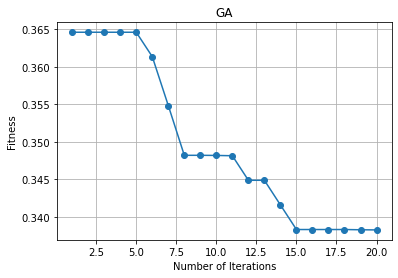

In [28]:
import numpy as np
from numpy.random import rand
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split  
import matplotlib.pyplot as plt



# error rate
def error_rate(xtrain, ytrain, x, opts):
    # parameters
    k     = opts['k']
    fold  = opts['fold']
    xt    = fold['xt']
    yt    = fold['yt']
    xv    = fold['xv']
    yv    = fold['yv']
    
    # Number of instances
    num_train = np.size(xt, 0)
    num_valid = np.size(xv, 0)
    # Define selected features
    xtrain  = xt[:, x == 1]
    ytrain  = yt.reshape(num_train)  # Solve bug
    xvalid  = xv[:, x == 1]
    yvalid  = yv.reshape(num_valid)  # Solve bug   
    # Training
    mdl     = KNeighborsClassifier(n_neighbors = k)
    mdl.fit(xtrain, ytrain)
    # Prediction
    ypred   = mdl.predict(xvalid)
    acc     = np.sum(yvalid == ypred) / num_valid
    error   = 1 - acc
    
    return error


# Error rate & Feature size
def Fun(xtrain, ytrain, x, opts):
    # Parameters
    alpha    = 0.99
    beta     = 1 - alpha
    # Original feature size
    max_feat = len(x)
    # Number of selected features
    num_feat = np.sum(x == 1)
    # Solve if no feature selected
    if num_feat == 0:
        cost  = 1
    else:
        # Get error rate
        error = error_rate(xtrain, ytrain, x, opts)
        # Objective function
        cost  = alpha * error + beta * (num_feat / max_feat)
        
    return cost


def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X


def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin


def roulette_wheel(prob):
    num = len(prob)
    C   = np.cumsum(prob)
    P   = rand()
    for i in range(num):
        if C[i] > P:
            index = i;
            break
    
    return index


def jfs(xtrain, ytrain, opts):
    # Parameters
    ub       = 1
    lb       = 0
    thres    = 0.5    
    CR       = 0.8     # crossover rate
    MR       = 0.01    # mutation rate
    
    N        = opts['N']
    max_iter = opts['T']
    if 'CR' in opts:
        CR   = opts['CR'] 
    if 'MR' in opts: 
        MR   = opts['MR']  
 
     # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position 
    X     = init_position(lb, ub, N, dim)
    
    # Binary conversion
    X     = binary_conversion(X, thres, N, dim)
    
    # Fitness at first iteration
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='int')
    fitG  = float('inf')
    
    for i in range(N):
        fit[i,0] = Fun(xtrain, ytrain, X[i,:], opts)
        if fit[i,0] < fitG:
            Xgb[0,:] = X[i,:]
            fitG     = fit[i,0]
    
    # Pre
    curve = np.zeros([1, max_iter], dtype='float')
    t     = 0
    
    curve[0,t] = fitG.copy()
    print("Generation:", t + 1)
    print("Best (GA):", curve[0,t])
    t += 1
    
    while t < max_iter:
        # Probability
        inv_fit = 1 / (1 + fit)
        prob    = inv_fit / np.sum(inv_fit) 
 
        # Number of crossovers
        Nc = 0
        for i in range(N):
            if rand() < CR:
                Nc += 1
              
        x1 = np.zeros([Nc, dim], dtype='int')
        x2 = np.zeros([Nc, dim], dtype='int')
        for i in range(Nc):
            # Parent selection
            k1      = roulette_wheel(prob)
            k2      = roulette_wheel(prob)
            P1      = X[k1,:].copy()
            P2      = X[k2,:].copy()
            # Random one dimension from 1 to dim
            index   = np.random.randint(low = 1, high = dim-1)
            # Crossover
            x1[i,:] = np.concatenate((P1[0:index] , P2[index:]))
            x2[i,:] = np.concatenate((P2[0:index] , P1[index:]))
            # Mutation
            for d in range(dim):
                if rand() < MR:
                    x1[i,d] = 1 - x1[i,d]
                    
                if rand() < MR:
                    x2[i,d] = 1 - x2[i,d]

        
        # Merge two group into one
        Xnew = np.concatenate((x1 , x2), axis=0)
        
        # Fitness
        Fnew = np.zeros([2 * Nc, 1], dtype='float')
        for i in range(2 * Nc):
            Fnew[i,0] = Fun(xtrain, ytrain, Xnew[i,:], opts)
            if Fnew[i,0] < fitG:
                Xgb[0,:] = Xnew[i,:]
                fitG     = Fnew[i,0]
                   
        # Store result
        curve[0,t] = fitG.copy()
        print("Generation:", t + 1)
        print("Best (GA):", curve[0,t])
        t += 1
        
        # Elitism 
        XX  = np.concatenate((X , Xnew), axis=0)
        FF  = np.concatenate((fit , Fnew), axis=0)
        # Sort in ascending order
        ind = np.argsort(FF, axis=0)
        for i in range(N):
            X[i,:]   = XX[ind[i,0],:]
            fit[i,0] = FF[ind[i,0]]
       
            
    # Best feature subset
    Gbin       = Xgb[0,:]
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))    
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    ga_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    return ga_data 



# load data
data  = df2
data  = data.values
feat  = np.asarray(data[:, 0:-1])
label = np.asarray(data[:, -1])

# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3, random_state = 42)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

# parameter
k    = 5     # k-value in KNN
N    = 10    # number of chromosomes
T    = 20   # maximum number of generations
CR   = 0.8
MR   = 0.01
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'CR':CR, 'MR':MR}

# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

# model with selected features
num_train = np.size(xtrain, 0)
num_valid = np.size(xtest, 0)
x_train   = xtrain[:, sf]
y_train   = ytrain.reshape(num_train)  # Solve bug
x_valid   = xtest[:, sf]
y_valid   = ytest.reshape(num_valid)  # Solve bug

mdl       = KNeighborsClassifier(n_neighbors = k) 
mdl.fit(x_train, y_train)

# accuracy
y_pred    = mdl.predict(x_valid)
Acc       = np.sum(y_valid == y_pred)  / num_valid
GA_acc = "Accuracy:", 100 * Acc
print(*GA_acc)

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('GA')
ax.grid()
plt.show()

## Precision, Recall and F1-Score of GA-KNN

In [29]:
from sklearn.metrics import precision_score
GA_prec = 'Precision: %.3f' % precision_score(ytest, y_pred, average='weighted')
print(GA_prec)
from sklearn.metrics import recall_score
GA_rec = 'Recall: %.3f' % recall_score(ytest, y_pred, average = 'weighted')
print(GA_rec)
from sklearn.metrics import f1_score
GA_f1 = 'F1 Score: %.3f' % f1_score(ytest, y_pred, average = 'weighted')
print(GA_f1)

Precision: 0.637
Recall: 0.663
F1 Score: 0.560


## PSO with KNN

Iteration: 1
Best (PSO): 0.3780330135194069
Iteration: 2
Best (PSO): 0.3745411251635412
Iteration: 3
Best (PSO): 0.35477383340601837
Iteration: 4
Best (PSO): 0.35138661142607935
Iteration: 5
Best (PSO): 0.35138661142607935
Iteration: 6
Best (PSO): 0.35138661142607935
Iteration: 7
Best (PSO): 0.35138661142607935
Iteration: 8
Best (PSO): 0.3448956389010031
Iteration: 9
Best (PSO): 0.3448956389010031
Iteration: 10
Best (PSO): 0.3448956389010031
Iteration: 11
Best (PSO): 0.34481495856955957
Iteration: 12
Best (PSO): 0.34481495856955957
Iteration: 13
Best (PSO): 0.33829563890100306
Iteration: 14
Best (PSO): 0.33829563890100306
Iteration: 15
Best (PSO): 0.33829563890100306
Iteration: 16
Best (PSO): 0.33829563890100306
Iteration: 17
Best (PSO): 0.3350436109899695
Iteration: 18
Best (PSO): 0.3350436109899695
Iteration: 19
Best (PSO): 0.33182429132141295
Iteration: 20
Best (PSO): 0.33179812472743125
Accuracy: 67.0
Feature Size: 2338


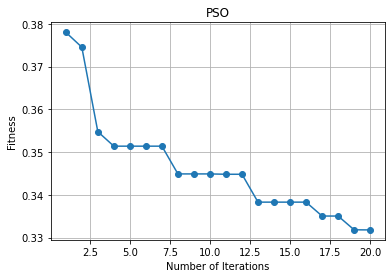

In [31]:
import numpy as np
from numpy.random import rand

# error rate
def error_rate(xtrain, ytrain, x, opts):
    # parameters
    k     = opts['k']
    fold  = opts['fold']
    xt    = fold['xt']
    yt    = fold['yt']
    xv    = fold['xv']
    yv    = fold['yv']
    
    # Number of instances
    num_train = np.size(xt, 0)
    num_valid = np.size(xv, 0)
    # Define selected features
    xtrain  = xt[:, x == 1]
    ytrain  = yt.reshape(num_train)  # Solve bug
    xvalid  = xv[:, x == 1]
    yvalid  = yv.reshape(num_valid)  # Solve bug   
    # Training
    mdl     = KNeighborsClassifier(n_neighbors = k)
    mdl.fit(xtrain, ytrain)
    # Prediction
    ypred   = mdl.predict(xvalid)
    acc     = np.sum(yvalid == ypred) / num_valid
    error   = 1 - acc
    
    return error


# Error rate & Feature size
def Fun(xtrain, ytrain, x, opts):
    # Parameters
    alpha    = 0.99
    beta     = 1 - alpha
    # Original feature size
    max_feat = len(x)
    # Number of selected features
    num_feat = np.sum(x == 1)
    # Solve if no feature selected
    if num_feat == 0:
        cost  = 1
    else:
        # Get error rate
        error = error_rate(xtrain, ytrain, x, opts)
        # Objective function
        cost  = alpha * error + beta * (num_feat / max_feat)
        
    return cost


def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X


def init_velocity(lb, ub, N, dim):
    V    = np.zeros([N, dim], dtype='float')
    Vmax = np.zeros([1, dim], dtype='float')
    Vmin = np.zeros([1, dim], dtype='float')
    # Maximum & minimum velocity
    for d in range(dim):
        Vmax[0,d] = (ub[0,d] - lb[0,d]) / 2
        Vmin[0,d] = -Vmax[0,d]
        
    for i in range(N):
        for d in range(dim):
            V[i,d] = Vmin[0,d] + (Vmax[0,d] - Vmin[0,d]) * rand()
        
    return V, Vmax, Vmin


def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin


def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub
    
    return x
    

def jfs(xtrain, ytrain, opts):
    # Parameters
    ub    = 1
    lb    = 0
    thres = 0.5
    w     = 0.9    # inertia weight
    c1    = 2      # acceleration factor
    c2    = 2      # acceleration factor
    
    N        = opts['N']
    max_iter = opts['T']
    if 'w' in opts:
        w    = opts['w']
    if 'c1' in opts:
        c1   = opts['c1']
    if 'c2' in opts:
        c2   = opts['c2'] 
    
    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position & velocity
    X             = init_position(lb, ub, N, dim)
    V, Vmax, Vmin = init_velocity(lb, ub, N, dim) 
    
    # Pre
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='float')
    fitG  = float('inf')
    Xpb   = np.zeros([N, dim], dtype='float')
    fitP  = float('inf') * np.ones([N, 1], dtype='float')
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0
    
    while t < max_iter:
        # Binary conversion
        Xbin = binary_conversion(X, thres, N, dim)
        
        # Fitness
        for i in range(N):
            fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
            if fit[i,0] < fitP[i,0]:
                Xpb[i,:]  = X[i,:]
                fitP[i,0] = fit[i,0]
            if fitP[i,0] < fitG:
                Xgb[0,:]  = Xpb[i,:]
                fitG      = fitP[i,0]
        
        # Store result
        curve[0,t] = fitG.copy()
        print("Iteration:", t + 1)
        print("Best (PSO):", curve[0,t])
        t += 1
        
        for i in range(N):
            for d in range(dim):
                # Update velocity
                r1     = rand()
                r2     = rand()
                V[i,d] = w * V[i,d] + c1 * r1 * (Xpb[i,d] - X[i,d]) + c2 * r2 * (Xgb[0,d] - X[i,d]) 
                # Boundary
                V[i,d] = boundary(V[i,d], Vmin[0,d], Vmax[0,d])
                # Update position
                X[i,d] = X[i,d] + V[i,d]
                # Boundary
                X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])
    
                
    # Best feature subset
    Gbin       = binary_conversion(Xgb, thres, 1, dim) 
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))    
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    pso_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    return pso_data    


import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
 
import matplotlib.pyplot as plt


# load data
data  = df2
data  = data.values
feat  = np.asarray(data[:, 0:-1])   # feature vector
label = np.asarray(data[:, -1])     # label vector

# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3, random_state = 42)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

# parameter
k    = 5     # k-value in KNN
N    = 10    # number of particles
T    = 20   # maximum number of iterations
w    = 0.9
c1   = 2
c2   = 2
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'w':w, 'c1':c1, 'c2':c2}

# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

# model with selected features
num_train = np.size(xtrain, 0)
num_valid = np.size(xtest, 0)
x_train   = xtrain[:, sf]
y_train   = ytrain.reshape(num_train)  # Solve bug
x_valid   = xtest[:, sf]
y_valid   = ytest.reshape(num_valid)  # Solve bug

mdl       = KNeighborsClassifier(n_neighbors = k) 
mdl.fit(x_train, y_train)

# accuracy
y_pred    = mdl.predict(x_valid)
Acc       = np.sum(y_valid == y_pred)  / num_valid
PSO_acc = "Accuracy:", 100 * Acc
print(*PSO_acc)

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('PSO')
ax.grid()
plt.show()

## Precision, Recall and F1-Score of PSO-KNN

In [32]:
from sklearn.metrics import precision_score
PSO_prec = 'Precision: %.3f' % precision_score(ytest, y_pred, average='weighted')
print(PSO_prec)
from sklearn.metrics import recall_score
PSO_rec = 'Recall: %.3f' % recall_score(ytest, y_pred, average = 'weighted')
print(PSO_prec)
from sklearn.metrics import f1_score
PSO_f1 = 'F1 Score: %.3f' % f1_score(ytest, y_pred, average = 'weighted')
print(PSO_f1)

Precision: 0.574
Precision: 0.574
F1 Score: 0.570


C:\Users\consu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Only KNN

In [33]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(xtrain, ytrain)
y_pred_5 = knn5.predict(xtest)
from sklearn.metrics import accuracy_score
KNN_acc = "Accuracy: ", accuracy_score(ytest, y_pred_5)*100
print(*KNN_acc)

Accuracy:  57.666666666666664


## Precision, Recall and F1-Score of only KNN

In [34]:
from sklearn.metrics import precision_score
KNN_prec = 'Precision: %.3f' % precision_score(ytest, y_pred_5, average='weighted')
print(KNN_prec)
from sklearn.metrics import recall_score
KNN_rec = 'Recall: %.3f' % recall_score(ytest, y_pred_5, average = 'weighted')
print(KNN_rec)
from sklearn.metrics import f1_score
KNN_f1 = 'F1 Score: %.3f' % f1_score(ytest, y_pred_5, average = 'weighted')
print(KNN_f1)

Precision: 0.548
Recall: 0.577
F1 Score: 0.494


In [35]:
from tabulate import tabulate
mydata = [["KNN", KNN_prec, KNN_rec, KNN_f1, KNN_acc],["PSO-KNN", PSO_prec, PSO_rec, PSO_f1, PSO_acc],["GA-KNN", GA_prec, GA_rec, GA_f1, GA_acc]]
# create header
head = ["Algorithm", "Precision_Score", "Recall_Score", "F1_Score", "Accuracy_Score"]
print(tabulate(mydata, headers=head, tablefmt="grid"))

+-------------+-------------------+----------------+-----------------+------------------------------------+
| Algorithm   | Precision_Score   | Recall_Score   | F1_Score        | Accuracy_Score                     |
+=============+===================+================+=================+====================================+
| KNN         | Precision: 0.548  | Recall: 0.577  | F1 Score: 0.494 | ('Accuracy: ', 57.666666666666664) |
+-------------+-------------------+----------------+-----------------+------------------------------------+
| PSO-KNN     | Precision: 0.574  | Recall: 0.670  | F1 Score: 0.570 | ('Accuracy:', 67.0)                |
+-------------+-------------------+----------------+-----------------+------------------------------------+
| GA-KNN      | Precision: 0.637  | Recall: 0.663  | F1 Score: 0.560 | ('Accuracy:', 66.33333333333333)   |
+-------------+-------------------+----------------+-----------------+------------------------------------+
